In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [6]:
df = pd.read_csv("C:/Users/Daveee/Desktop/Credit scoring/creidt scoring.csv")
df

C:\Users\Daveee\AppData\Local\Temp\ipykernel_7180\3220878565.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Daveee/Desktop/Credit scoring/creidt scoring.csv")


ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
99995   Mechanic      39628.99            3359.415833                  4  ...   
99996   Mechanic      39628.99            3359.415833                  4  ...   
99997   Mechanic      39628.99            3359.415833                  4  ...   
99998   Mechanic      39628.99            3359.415833                  4  ...   
99999   Mechanic     39628.99_            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0               _            809.98                26.822620   
1            Good            809.98                31.944960   
2            Good            809.98                28.609352   
3            Good            809.98                31.377862   
4            Good            809.98                24.797347   
...           ...               ...                      ...   
99995           _            502.38                34.663572   
99996           _            502.38                40.565631   
99997        Good            502.38                41.255522   
99998        Good            502.38                33.638208   
99999        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2                 81.69952126   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...                               ...   

In [7]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [9]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

#### Divide data into numeric and catagorical for further data anlasis and preprocessing accordgly 

In [10]:
# Identify numeric columns
numeric_col = df.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns
categorical_col = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Print the lists
print("Numeric columns:", numeric_col)
print("Categorical columns:", categorical_col)


Numeric columns: ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
Categorical columns: ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


# Explanatory data analytics (EDA) 

## Catagorical data analysis   
#### show distrbution credit accros the country on map
- from Region name we extract the latitude and longitude
- from Geopspatial data we extract shapes 
- we view the disribution of credit on contry 
- identfy which region is mostly take credit and why

# Occupation vs Credit_Score

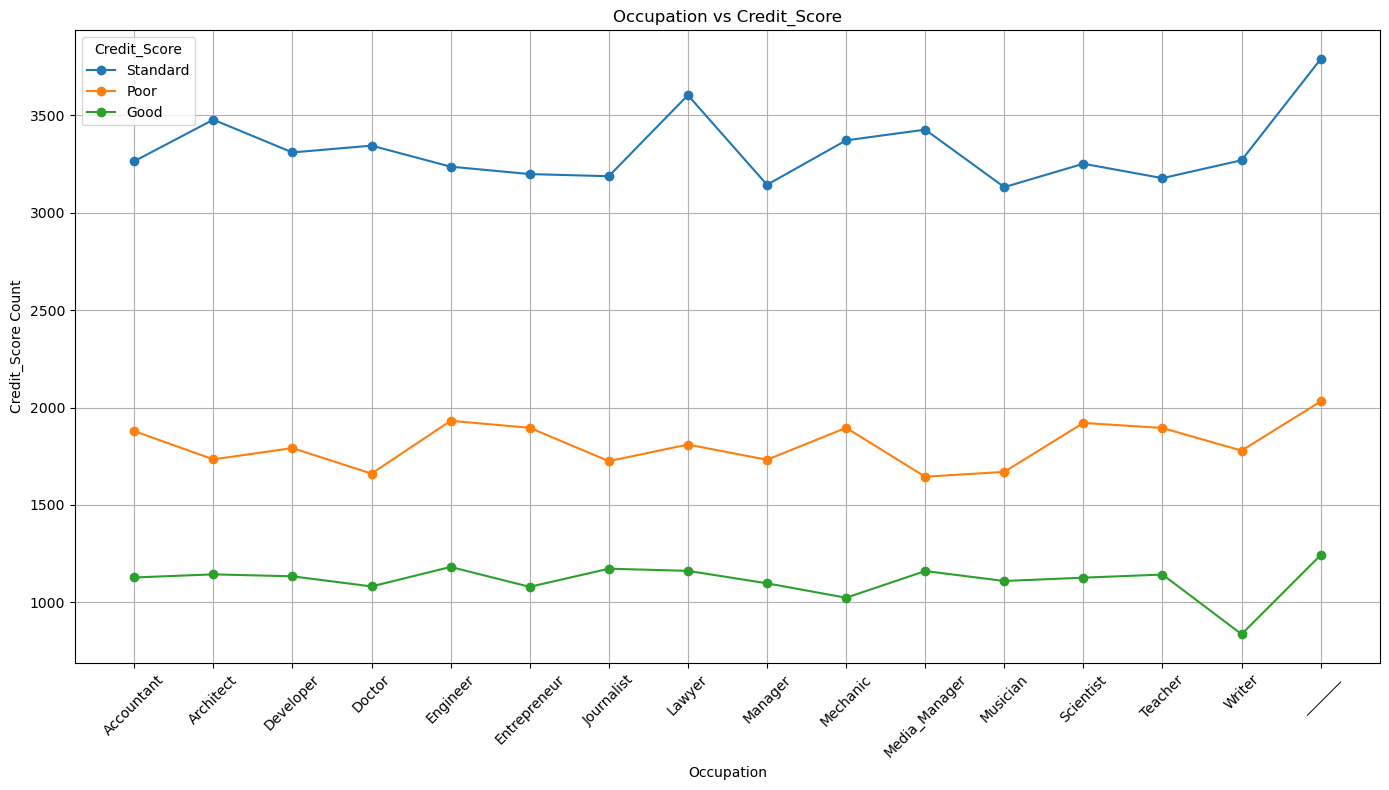

In [17]:
# Pivot the data to get counts of each Loan_Status for each Districtname
pivot_df = df.pivot_table(index='Occupation', columns='Credit_Score', aggfunc='size', fill_value=0).reset_index()

# Plotting the line graph
plt.figure(figsize=(14, 8))

# Plot each Loan_Status
for status in ['Standard', 'Poor', 'Good']:
    if status in pivot_df.columns:
        plt.plot(pivot_df['Occupation'], pivot_df[status], marker='o', linestyle='-', label=status)

plt.xlabel('Occupation')
plt.ylabel('Credit_Score Count')
plt.title('Occupation vs Credit_Score')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Calculate the count of each loan status per region
loan_status_counts = df.groupby(['Occupation', 'Credit_Score']).size().unstack(fill_value=0)

# Calculate the total number of loans per region
total_loans_per_region = loan_status_counts.sum(axis=1)

# Calculate the percentage distribution of each loan status per region
loan_status_percentages = loan_status_counts.div(total_loans_per_region, axis=0) * 100

# Print the resulting DataFrame
print(loan_status_percentages)

Credit_Score        Good       Poor   Standard
Occupation                                    
Accountant     17.987562  29.963323  52.049115
Architect      18.001574  27.285602  54.712825
Developer      18.187650  28.740978  53.071371
Doctor         17.775587  27.287662  54.936750
Engineer       18.614173  30.425197  50.960630
Entrepreneur   17.492711  30.709427  51.797862
Journalist     19.276910  28.348398  52.374692
Lawyer         17.673004  27.528517  54.798479
Manager        18.382722  28.997154  52.620124
Mechanic       16.277221  30.138293  53.584486
Media_Manager  18.629653  26.396021  54.974326
Musician       18.778548  28.252411  52.969041
Scientist      17.891729  30.496904  51.611367
Teacher        18.390990  30.490748  51.118262
Writer         14.222600  30.229397  55.548003
_______        17.601246  28.759558  53.639196


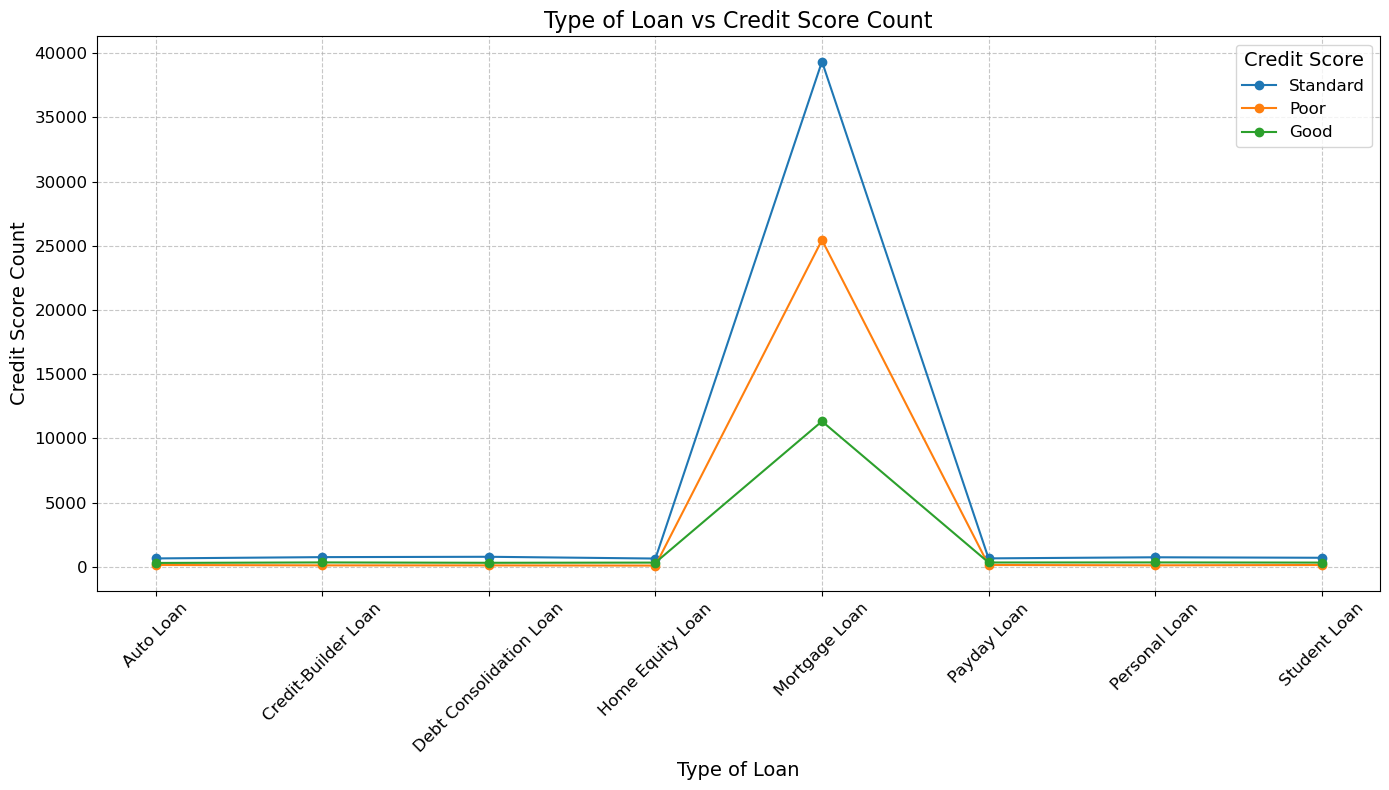

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# List of specified loan types
loan_types = [
    'Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan',
    'Mortgage Loan', 'Debt Consolidation Loan', 'Payday Loan', 'Student Loan'
]

# Drop rows with missing values
df = df.dropna(subset=['Type_of_Loan', 'Credit_Score'])

# Group `Type_of_Loan` into specified categories
df['Type_of_Loan'] = df['Type_of_Loan'].apply(
    lambda x: x if x in loan_types else 'Mortgage Loan'
)

# Pivot the data to get counts of each Credit_Score for each Type_of_Loan
pivot_df = df.pivot_table(
    index='Type_of_Loan', columns='Credit_Score', aggfunc='size', fill_value=0
).reset_index()

# Plotting the line graph
plt.figure(figsize=(14, 8))

# Define Credit_Score categories
credit_scores = ['Standard', 'Poor', 'Good']

# Plot each Credit_Score
for score in credit_scores:
    if score in pivot_df.columns:
        plt.plot(pivot_df['Type_of_Loan'], pivot_df[score], marker='o', linestyle='-', label=score)

# Enhancing the plot
plt.xlabel('Type of Loan', fontsize=14)
plt.ylabel('Credit Score Count', fontsize=14)
plt.title('Type of Loan vs Credit Score Count', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Credit Score', fontsize=12, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
'Payment_Behaviour' 

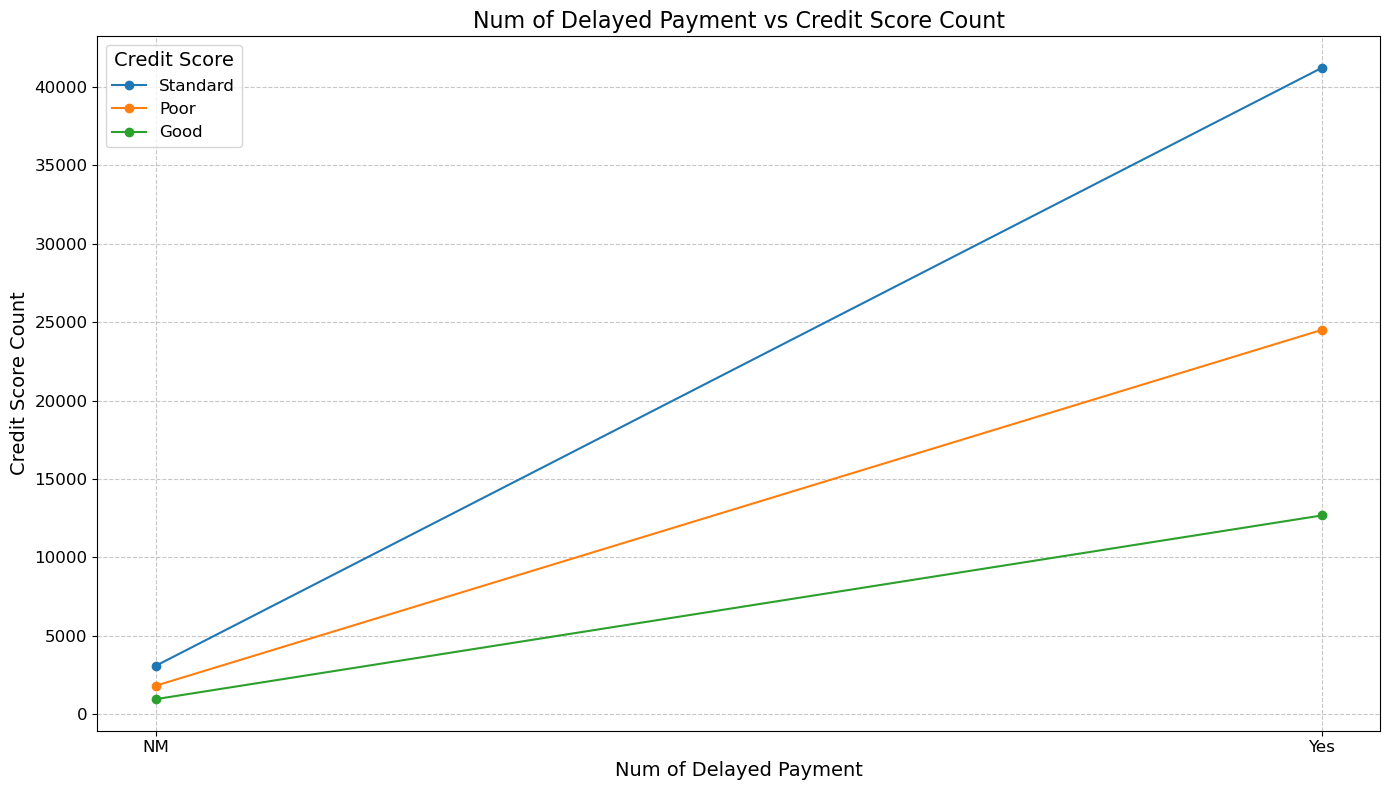

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Transform `Num_of_Delayed_Payment` into 'No', 'Yes', and 'NM'
def categorize_delayed_payment(value):
    if pd.isnull(value):  # If value is NaN, categorize as 'NM'
        return 'NM'
    elif value == 0:  # If value is 0, categorize as 'No'
        return 'No'
    else:  # All other values are categorized as 'Yes'
        return 'Yes'

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(categorize_delayed_payment)

# Pivot the data to get counts of each Credit_Score for each Num_of_Delayed_Payment category
pivot_df = df.pivot_table(
    index='Num_of_Delayed_Payment', columns='Credit_Score', aggfunc='size', fill_value=0
).reset_index()

# Plotting the line graph
plt.figure(figsize=(14, 8))

# Define Credit_Score categories
credit_scores = ['Standard', 'Poor', 'Good']

# Plot each Credit_Score
for score in credit_scores:
    if score in pivot_df.columns:
        plt.plot(pivot_df['Num_of_Delayed_Payment'], pivot_df[score], marker='o', linestyle='-', label=score)

# Enhancing the plot
plt.xlabel('Num of Delayed Payment', fontsize=14)
plt.ylabel('Credit Score Count', fontsize=14)
plt.title('Num of Delayed Payment vs Credit Score Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Credit Score', fontsize=12, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


## Numerical data analysis  

C:\Users\Daveee\AppData\Local\Temp\ipykernel_7180\1093293137.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index='Age_Group', columns='Credit_Score', aggfunc='size', fill_value=0)


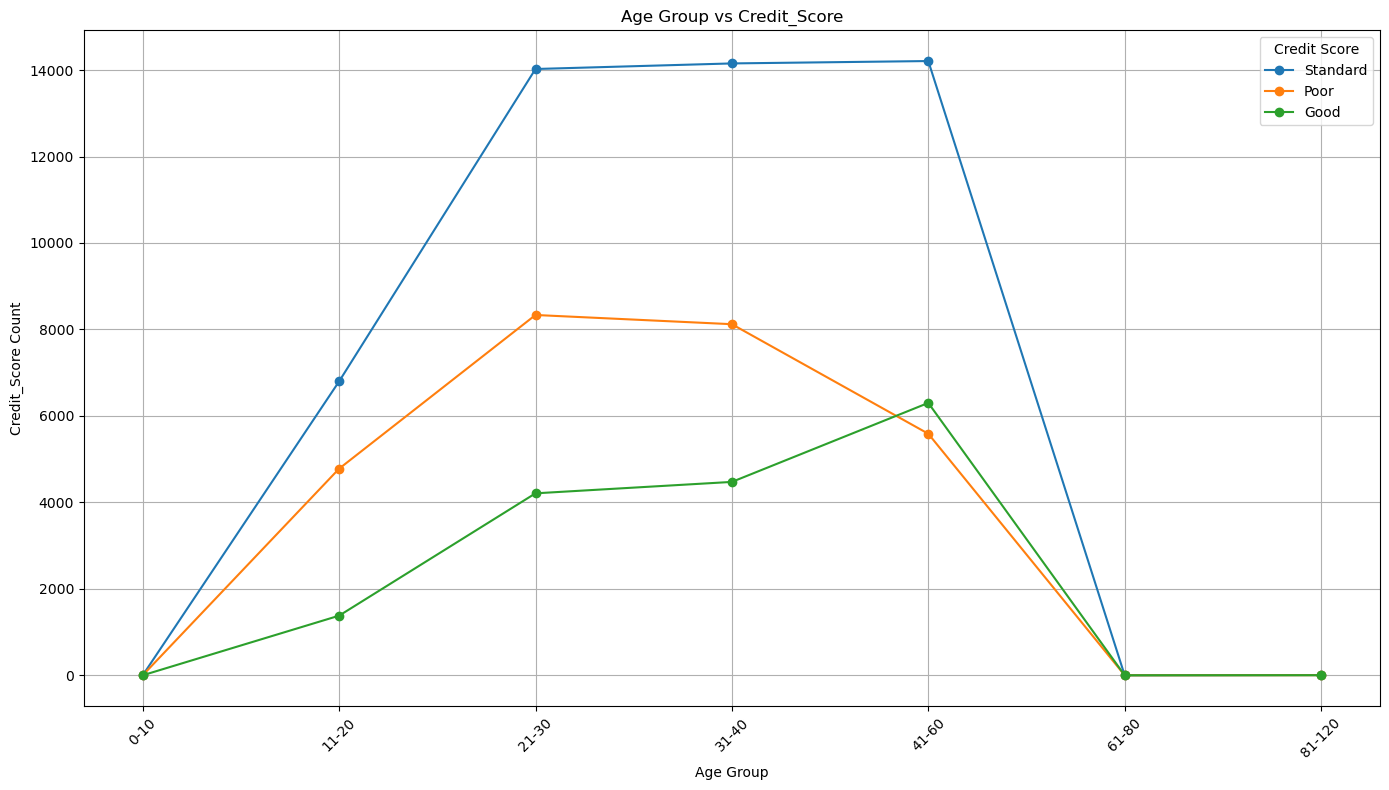

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Age' is numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows where 'Age' is NaN (invalid entries)
df = df.dropna(subset=['Age'])

# Define age bins and labels
age_bins = [0, 10, 20, 30, 40, 60, 80, 120]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-60', '61-80', '81-120']

# Group Age into bins directly in the pivot_table
pivot_df = (
    df.assign(Age_Group=pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True))
    .pivot_table(index='Age_Group', columns='Credit_Score', aggfunc='size', fill_value=0)
    .reset_index()
)

# Plotting the line graph
plt.figure(figsize=(14, 8))

# Plot each Credit_Score
for status in ['Standard', 'Poor', 'Good']:
    if status in pivot_df.columns:
        plt.plot(pivot_df['Age_Group'], pivot_df[status], marker='o', linestyle='-', label=status)

plt.xlabel('Age Group')
plt.ylabel('Credit_Score Count')
plt.title('Age Group vs Credit_Score')
plt.xticks(rotation=45)
plt.legend(title='Credit Score')
plt.grid(True)
plt.tight_layout()

plt.show()


In [6]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np

# Load data
df = pd.read_excel('C:/Users/Daveee/Desktop/Credit scoring/cleaned_data_2020-2024.xlsx')
df1 = pd.read_csv("C:/Users/Daveee/Desktop/Credit scoring/creidt scoring.csv")

# Select specific columns from df1
columns_to_select = [
    'Occupation', 'Age', 'Annual_Income', 'Interest_Rate', 
    'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 
    'Payment_Behaviour', 'Monthly_Balance'
]
df1_selected = df1[columns_to_select]

# Ensure row alignment
if len(df1_selected) > len(df):
    df1_selected = df1_selected.iloc[:len(df)]  # Truncate to match df
elif len(df1_selected) < len(df):
    raise ValueError("df1 has fewer rows than df. Cannot align.")

# Replace '_______' with NaN
df1_selected.replace('_______', np.nan, inplace=True)

# Separate numerical and categorical columns
numerical_cols = df1_selected.select_dtypes(include=['number']).columns
categorical_cols = df1_selected.select_dtypes(exclude=['number']).columns

# Handle missing values
# KNN Imputation for numerical columns
imputer = KNNImputer(n_neighbors=5)
df1_selected[numerical_cols] = imputer.fit_transform(df1_selected[numerical_cols])

# Mode imputation for categorical columns
for col in categorical_cols:
    df1_selected[col].fillna(df1_selected[col].mode()[0], inplace=True)

# Concatenate df1_selected to the left of df
final_df = pd.concat([df1_selected, df], axis=1)

# Save the combined dataframe
final_df.to_csv("C:/Users/Daveee/Desktop/Credit scoring/final_combined.csv", index=False)

print("Data successfully combined and saved!")


C:\Users\Daveee\AppData\Local\Temp\ipykernel_13764\1888094738.py:7: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("C:/Users/Daveee/Desktop/Credit scoring/creidt scoring.csv")
C:\Users\Daveee\AppData\Local\Temp\ipykernel_13764\1888094738.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1_selected[col].fillna(df1_selected[col].mode()[0], inplace=True)


Data successfully combined and saved!


In [2]:
df2 = pd.read_csv("C:/Users/Daveee/Desktop/Credit scoring/final_combined.csv")
df2

Occupation   Age Annual_Income  Interest_Rate  \
0         Scientist    23      19114.12            3.0   
1         Scientist    23      19114.12            3.0   
2         Scientist  -500      19114.12            3.0   
3         Scientist    23      19114.12            3.0   
4         Scientist    23      19114.12            3.0   
...             ...   ...           ...            ...   
5779  Media_Manager    21      15399.52           18.0   
5780  Media_Manager    21      15399.52           18.0   
5781  Media_Manager    21     15399.52_           18.0   
5782  Media_Manager    21      15399.52           18.0   
5783  Media_Manager    21      15399.52           18.0   

                                           Type_of_Loan  Delay_from_due_date  \
0     Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
1     Auto Loan, Credit-Builder Loan, Personal Loan,...                 -1.0   
2     Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
3     Auto Loan, Credit-Builder Loan, Personal Loan,...                  5.0   
4     Auto Loan, Credit-Builder Loan, Personal Loan,...                  6.0   
...                                                 ...                  ...   
5779                                          Auto Loan                 30.0   
5780                                          Auto Loan                 29.0   
5781                                          Auto Loan                 25.0   
5782                                          Auto Loan                 25.0   
5783                                          Auto Loan                 28.0   

     Num_of_Delayed_Payment                 Payment_Behaviour  \
0                         7   High_spent_Small_value_payments   
1                        16    Low_spent_Large_value_payments   
2                         7   Low_spent_Medium_value_payments   
3                         4    Low_spent_Small_value_payments   
4                        16  High_spent_Medium_value_payments   
...                     ...                               ...   
5779                     16    Low_spent_Small_value_payments   
5780                     14   High_spent_Small_value_payments   
5781                     14    Low_spent_Small_value_payments   
5782                     17                            !@9#%8   
5783                     17    Low_spent_Large_value_payments   

         Monthly_Balance  CONTRACT_CODE  ...  RISK_GRADE  \
0     312.49408867943663  1000000894978  ...         RG4   
1     284.62916249607184  1000000908359  ...         RG1   
2      331.2098628537912  1000000909045  ...         RG3   
3     223.45130972736786  1000000914189  ...         RG2   
4     341.48923103222177  1000000917037  ...         RG2   
...                  ...            ...  ...         ...   
5779         263.5583667  1000043579642  ...         RG3   
5780  337.84512681233986  1000295865257  ...         RG2   
5781  301.54230000900867  1000246899944  ...         RG3   
5782   332.4912396090544  1000377434394  ...         RG3   
5783  325.67782627186614  1000362521398  ...         RG2   

               ECONOMIC_SECTOR                             INDUSTRY  \
0                       Export  Export -Pulses,Oilseeds cake,Sesame   
1                Manufacturing   Manufactureof basic iron and steel   
2                       Export                    Export of cereals   
3                       Export                   Export of oilseeds   
4                Manufacturing        Furniture, fixture & fittings   
...                        ...                                  ...   
5779  Consumer and staff loans                    Other individuals   
5780  Consumer and staff loans                       Temporary Crop   
5781  Consumer and staff loans                    Other individuals   
5782  Consumer and staff loans                    Other individuals   
5783  Consumer and staff loans          Retail agriculture products 

In [3]:
df2.isnull().sum()

Occupation                    0
Age                           0
Annual_Income                 0
Interest_Rate                 0
Type_of_Loan                  0
Delay_from_due_date           0
Num_of_Delayed_Payment        0
Payment_Behaviour             0
Monthly_Balance               0
CONTRACT_CODE                 0
APPROVED_AMOUNT               0
GRANT_DATE                    0
EXPIRY_DATE                   0
TENURE                        0
TERM                          0
LOAN_TYPE                     0
LOAN_DESCRIPTION              0
LOAN_PRODUCT                  0
LTYPE                         0
BUSINESS_DATE                 0
PRINCIPAL_OS                  0
INTEREST_OS                   0
PRINCIPAL_ARREARS             0
CURRENT_COMMITTMENT           0
INSTALLMENT_AMOUNT            0
INSTALLMENT_FREQ_PRINCIPAL    0
INSTALLMENT_FREQ_INTEREST     0
RISK_GRADE                    0
ECONOMIC_SECTOR               0
INDUSTRY                      0
SECTOR                        0
TERM_OF_

In [4]:
df2.columns

Index(['Occupation', 'Age', 'Annual_Income', 'Interest_Rate', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Payment_Behaviour',
       'Monthly_Balance', 'CONTRACT_CODE', 'APPROVED_AMOUNT', 'GRANT_DATE',
       'EXPIRY_DATE', 'TENURE', 'TERM', 'LOAN_TYPE', 'LOAN_DESCRIPTION',
       'LOAN_PRODUCT', 'LTYPE', 'BUSINESS_DATE', 'PRINCIPAL_OS', 'INTEREST_OS',
       'PRINCIPAL_ARREARS', 'CURRENT_COMMITTMENT', 'INSTALLMENT_AMOUNT',
       'INSTALLMENT_FREQ_PRINCIPAL', 'INSTALLMENT_FREQ_INTEREST', 'RISK_GRADE',
       'ECONOMIC_SECTOR', 'INDUSTRY', 'SECTOR', 'TERM_OF_PAYMENT',
       'COLLATTERAL', 'COLLATERAL_VALUE', 'year', 'Credit_Score',
       'Occupation.1'],
      dtype='object')

In [5]:
# Drop specified columns without saving changes permanently
columns_to_drop = ['GRANT_DATE', 'EXPIRY_DATE', 'LOAN_TYPE', 'year', 'Occupation.1', 'BUSINESS_DATE', 'CONTRACT_CODE']
df2_temp = df2.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df2_temp.head())


  Occupation   Age Annual_Income  Interest_Rate  \
0  Scientist    23      19114.12            3.0   
1  Scientist    23      19114.12            3.0   
2  Scientist  -500      19114.12            3.0   
3  Scientist    23      19114.12            3.0   
4  Scientist    23      19114.12            3.0   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                 -1.0   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                  5.0   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                  6.0   

  Num_of_Delayed_Payment                 Payment_Behaviour  \
0                      7   High_spent_Small_value_payments   
1                     16    Low_spent_Large_value_payments   
2                      7   Low_spent_Medium_

In [6]:
df2_temp.columns

Index(['Occupation', 'Age', 'Annual_Income', 'Interest_Rate', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Payment_Behaviour',
       'Monthly_Balance', 'APPROVED_AMOUNT', 'TENURE', 'TERM',
       'LOAN_DESCRIPTION', 'LOAN_PRODUCT', 'LTYPE', 'PRINCIPAL_OS',
       'INTEREST_OS', 'PRINCIPAL_ARREARS', 'CURRENT_COMMITTMENT',
       'INSTALLMENT_AMOUNT', 'INSTALLMENT_FREQ_PRINCIPAL',
       'INSTALLMENT_FREQ_INTEREST', 'RISK_GRADE', 'ECONOMIC_SECTOR',
       'INDUSTRY', 'SECTOR', 'TERM_OF_PAYMENT', 'COLLATTERAL',
       'COLLATERAL_VALUE', 'Credit_Score'],
      dtype='object')

In [7]:
# Columns to clean
categorical_columns = ['Occupation', 'Payment_Behaviour', 'Type_of_Loan']
numerical_columns = [
    'Age', 'Annual_Income', 'Interest_Rate', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Monthly_Balance'
]

# Process categorical columns (Occupation, Payment_Behaviour, Type_of_Loan)
for col in categorical_columns:
    if col in df2_temp.columns:
        print(f"Cleaning categorical column: {col}")
        
        # Remove unwanted symbols and keep as string
        df2_temp[col] = df2_temp[col].astype(str).str.replace(r'[_!@9#%8]', '', regex=True)
        df2_temp[col] = df2_temp[col].replace('', pd.NA)  # Replace empty strings with NaN
        
        # Fill missing values with mode
        if not df2_temp[col].mode().empty:
            mode_value = df2_temp[col].mode()[0]
            df2_temp[col] = df2_temp[col].fillna(mode_value)
        else:
            print(f"No mode found for {col}. Column contains only NaN or invalid values.")

# Process numerical columns (Age, Annual_Income, etc.)
for col in numerical_columns:
    if col in df2_temp.columns:
        print(f"Cleaning numerical column: {col}")
        
        # Remove unwanted symbols and convert to numeric
        df2_temp[col] = df2_temp[col].astype(str).str.replace(r'[_!@9#%8]', '', regex=True)
        df2_temp[col] = pd.to_numeric(df2_temp[col], errors='coerce')  # Convert to numeric, invalid values become NaN
        
        # Fill missing values with the mean for numerical columns
        mean_value = df2_temp[col].mean()
        df2_temp[col] = df2_temp[col].fillna(mean_value)

# Verify cleaned data
print("Cleaned DataFrame:")
print(df2_temp.head())


Cleaning categorical column: Occupation
Cleaning categorical column: Payment_Behaviour
Cleaning categorical column: Type_of_Loan
Cleaning numerical column: Age
Cleaning numerical column: Annual_Income
Cleaning numerical column: Interest_Rate
Cleaning numerical column: Delay_from_due_date
Cleaning numerical column: Num_of_Delayed_Payment
Cleaning numerical column: Monthly_Balance
Cleaned DataFrame:
  Occupation  Age  Annual_Income  Interest_Rate  \
0  Scientist   23        1114.12            3.0   
1  Scientist   23        1114.12            3.0   
2  Scientist -500        1114.12            3.0   
3  Scientist   23        1114.12            3.0   
4  Scientist   23        1114.12            3.0   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                 -1.0   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...         

In [8]:
df2_temp.dtypes

Occupation                     object
Age                             int64
Annual_Income                 float64
Interest_Rate                 float64
Type_of_Loan                   object
Delay_from_due_date           float64
Num_of_Delayed_Payment        float64
Payment_Behaviour              object
Monthly_Balance               float64
APPROVED_AMOUNT               float64
TENURE                         object
TERM                           object
LOAN_DESCRIPTION               object
LOAN_PRODUCT                   object
LTYPE                          object
PRINCIPAL_OS                  float64
INTEREST_OS                   float64
PRINCIPAL_ARREARS             float64
CURRENT_COMMITTMENT           float64
INSTALLMENT_AMOUNT            float64
INSTALLMENT_FREQ_PRINCIPAL      int64
INSTALLMENT_FREQ_INTEREST       int64
RISK_GRADE                     object
ECONOMIC_SECTOR                object
INDUSTRY                       object
SECTOR                         object
TERM_OF_PAYM

# Model XAI and Best Performing Saving 

Initial DataFrame columns and types:
Occupation                      int32
Age                             int64
Annual_Income                 float64
Interest_Rate                 float64
Type_of_Loan                    int32
Delay_from_due_date           float64
Num_of_Delayed_Payment        float64
Payment_Behaviour               int32
Monthly_Balance               float64
APPROVED_AMOUNT               float64
TENURE                          int32
TERM                            int32
LOAN_DESCRIPTION                int32
LOAN_PRODUCT                    int32
LTYPE                           int32
PRINCIPAL_OS                  float64
INTEREST_OS                   float64
PRINCIPAL_ARREARS             float64
CURRENT_COMMITTMENT           float64
INSTALLMENT_AMOUNT            float64
INSTALLMENT_FREQ_PRINCIPAL      int64
INSTALLMENT_FREQ_INTEREST       int64
RISK_GRADE                      int32
ECONOMIC_SECTOR                 int32
INDUSTRY                        int32
SECTOR       

 95%|=================== | 3284/3471 [00:14<00:00]       

Multiclass SHAP values shape: (1157, 29, 3)
Plotting SHAP summary for class 0
Plotting SHAP summary for class 1
Plotting SHAP summary for class 2


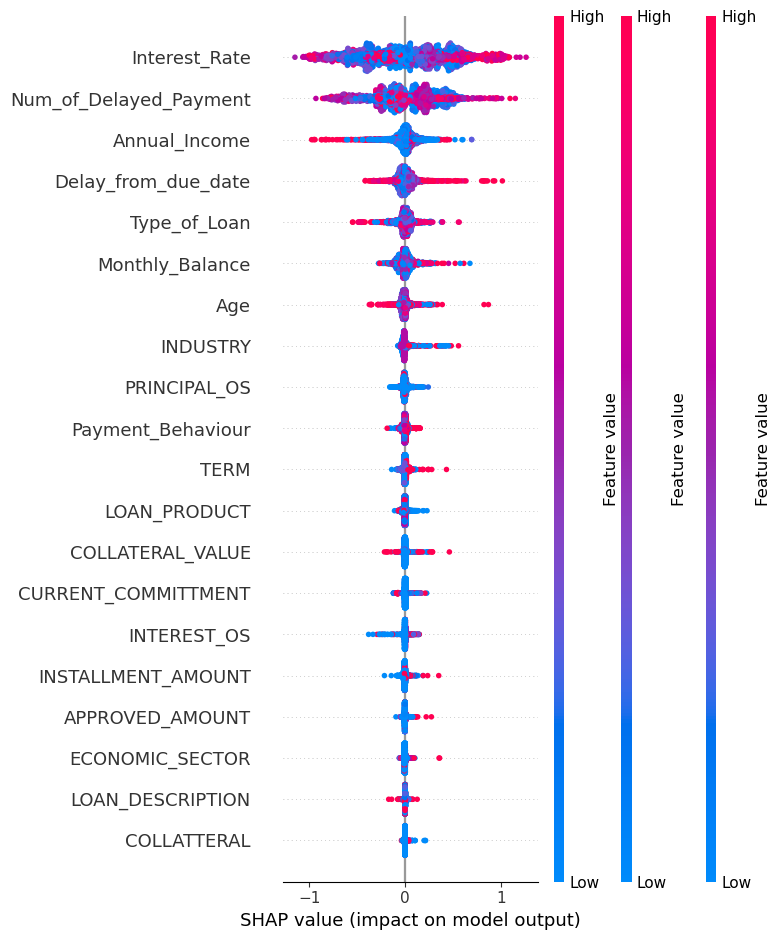

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and modify to load your data

# Assuming df is your DataFrame containing the data
# Example: df = pd.DataFrame(...)

# Print initial DataFrame columns and types for debugging
print("Initial DataFrame columns and types:")
print(df.dtypes)

# Ensure 'Credit_Score' column exists
if 'Credit_Score' not in df.columns:
    raise ValueError("'Credit_Score' column is missing from the DataFrame.")

# Identify and drop date and time columns
date_columns = df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns.tolist()
df = df.drop(columns=date_columns, errors='ignore')  # Drop date columns
print(f"Dropped date columns: {date_columns}")

# List columns with non-numeric values (categorical)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Columns with non-numeric values: {categorical_columns}")

# Encode categorical columns using LabelEncoder (since XGBoost doesn't handle them directly)
label_encoders = {}
for col in categorical_columns:
    if col in df.columns:  # Check if column exists before encoding
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    else:
        print(f"Column {col} not found in the DataFrame. Skipping encoding for this column.")

# Split data into features and target variable
X = df.drop(columns=['Credit_Score'], errors='ignore')  # Target variable is 'Credit_Score'
y = df['Credit_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = XGBClassifier(n_estimators=30, learning_rate=0.1, max_depth=6, eval_metric='mlogloss')
model.fit(X_train, y_train)

# --------------------------------
# EXPLAINING WITH SHAP
# --------------------------------

# Initialize SHAP explainer with the trained XGBoost model
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for test data
shap_values = explainer(X_test)

# Check if SHAP values are for multiple classes (i.e., a list of arrays)
if isinstance(shap_values.values, np.ndarray) and shap_values.values.ndim == 3:
    print(f"Multiclass SHAP values shape: {shap_values.values.shape}")
    
    # Loop over each class and plot SHAP summary for each class
    for class_idx in range(shap_values.values.shape[2]):
        print(f"Plotting SHAP summary for class {class_idx}")
        shap.summary_plot(shap_values[..., class_idx], X_test, show=False)
else:
    # If it's not a multiclass problem, shap_values will be a single array
    shap.summary_plot(shap_values, X_test)

# --------------------------------
# EXPLAINING WITH LIME
# --------------------------------

# Initialize LIME explainer using the original feature names
lime_explainer = LimeTabularExplainer(X_train.values,
                                      feature_names=X_train.columns,
                                      class_names=['Standard', 'Poor', 'Good'],
                                      categorical_features=[X_train.columns.get_loc(col) for col in categorical_columns if col in X_train.columns],
                                      mode='classification')

# Explain individual predictions using LIME
instance_to_explain = X_test.iloc[3]
explanation = lime_explainer.explain_instance(instance_to_explain.values, model.predict_proba)

# Visualize LIME explanation
explanation.show_in_notebook()


Initial DataFrame columns and types:
Occupation                      int32
Age                             int64
Annual_Income                 float64
Interest_Rate                 float64
Type_of_Loan                    int32
Delay_from_due_date           float64
Num_of_Delayed_Payment        float64
Payment_Behaviour               int32
Monthly_Balance               float64
APPROVED_AMOUNT               float64
TENURE                          int32
TERM                            int32
LOAN_DESCRIPTION                int32
LOAN_PRODUCT                    int32
LTYPE                           int32
PRINCIPAL_OS                  float64
INTEREST_OS                   float64
PRINCIPAL_ARREARS             float64
CURRENT_COMMITTMENT           float64
INSTALLMENT_AMOUNT            float64
INSTALLMENT_FREQ_PRINCIPAL      int64
INSTALLMENT_FREQ_INTEREST       int64
RISK_GRADE                      int32
ECONOMIC_SECTOR                 int32
INDUSTRY                        int32
SECTOR       

 92%|==================  | 3202/3471 [00:14<00:01]       

Multiclass SHAP values shape: (1157, 29, 3)
Plotting SHAP summary for class 0
Plotting SHAP summary for class 1
Plotting SHAP summary for class 2


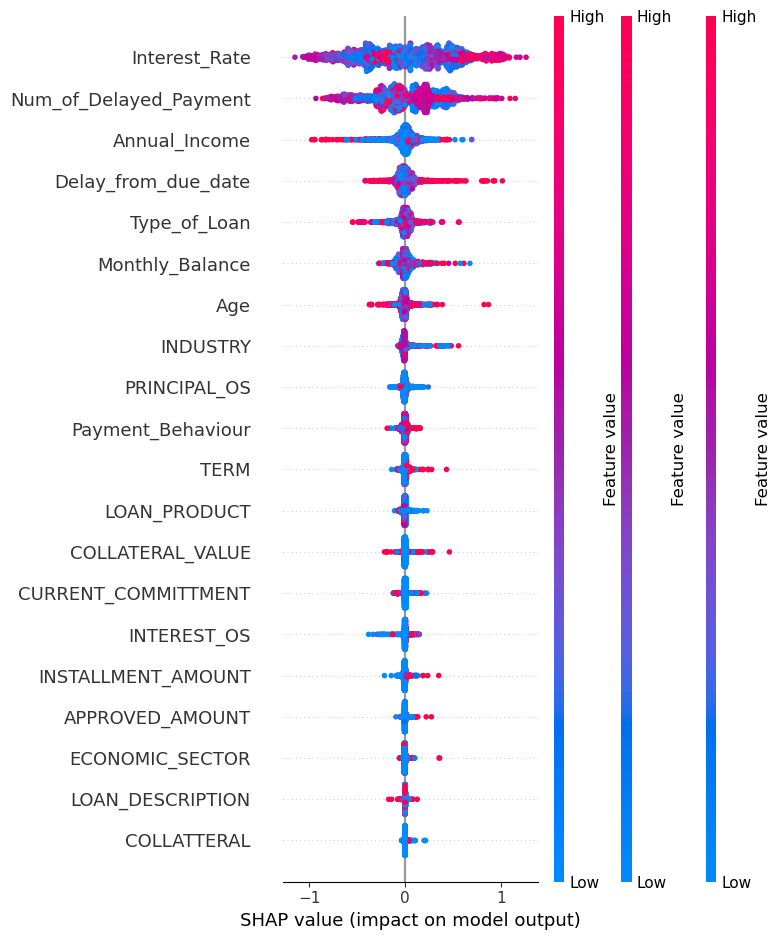

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and modify to load your data

# Assuming df is your DataFrame containing the data
# Example: df = pd.DataFrame(...)

# Print initial DataFrame columns and types for debugging
print("Initial DataFrame columns and types:")
print(df.dtypes)

# Ensure 'Credit_Score' column exists
if 'Credit_Score' not in df.columns:
    raise ValueError("'Credit_Score' column is missing from the DataFrame.")

# Identify and drop date and time columns
date_columns = df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns.tolist()
df = df.drop(columns=date_columns, errors='ignore')  # Drop date columns
print(f"Dropped date columns: {date_columns}")

# List columns with non-numeric values (categorical)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Columns with non-numeric values: {categorical_columns}")

# Encode categorical columns using LabelEncoder (since XGBoost doesn't handle them directly)
label_encoders = {}
for col in categorical_columns:
    if col in df.columns:  # Check if column exists before encoding
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    else:
        print(f"Column {col} not found in the DataFrame. Skipping encoding for this column.")

# Split data into features and target variable
X = df.drop(columns=['Credit_Score'], errors='ignore')  # Target variable is 'Credit_Score'
y = df['Credit_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = XGBClassifier(n_estimators=30, learning_rate=0.1, max_depth=6, eval_metric='mlogloss')
model.fit(X_train, y_train)

# --------------------------------
# EXPLAINING WITH SHAP
# --------------------------------

# Initialize SHAP explainer with the trained XGBoost model
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for test data
shap_values = explainer(X_test)

# Check if SHAP values are for multiple classes (i.e., a list of arrays)
if isinstance(shap_values.values, np.ndarray) and shap_values.values.ndim == 3:
    print(f"Multiclass SHAP values shape: {shap_values.values.shape}")
    
    # Loop over each class and plot SHAP summary for each class
    for class_idx in range(shap_values.values.shape[2]):
        print(f"Plotting SHAP summary for class {class_idx}")
        shap.summary_plot(shap_values[..., class_idx], X_test, show=False)
else:
    # If it's not a multiclass problem, shap_values will be a single array
    shap.summary_plot(shap_values, X_test)

# --------------------------------
# EXPLAINING WITH LIME
# --------------------------------

# Initialize LIME explainer using the original feature names
lime_explainer = LimeTabularExplainer(X_train.values,
                                      feature_names=X_train.columns,
                                      class_names=['Standard', 'Poor', 'Good'],
                                      categorical_features=[X_train.columns.get_loc(col) for col in categorical_columns if col in X_train.columns],
                                      mode='classification')

# Explain individual predictions using LIME
instance_to_explain = X_test.iloc[20]
explanation = lime_explainer.explain_instance(instance_to_explain.values, model.predict_proba)

# Visualize LIME explanation
explanation.show_in_notebook()


## Save Best performing model

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from xgboost import XGBClassifier
import joblib

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Exclude any columns related to dates (if any exist in the dataset)
date_columns = ['Date']  # Replace with actual date column names if applicable
df2_temp = df2_temp.drop(columns=date_columns, errors='ignore')

# Split features and target (assuming 'Stage' is the target column)
X = df2_temp.drop(columns=['Credit_Score'])
y = df2_temp['Credit_Score']

# Encode the target labels
stage_encoder = LabelEncoder()
y = stage_encoder.fit_transform(y)

# Identify categorical features (assume 'object', 'category', and 'bool' types)
categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns

# # Include 'Laboratory Service' explicitly if it needs to be treated as categorical
# if 'Laboratory Service' in X.columns:
#     categorical_cols = categorical_cols.tolist() + ['Laboratory Service']

# Apply Label Encoding for categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Save the encoder for each categorical feature

# Identify numerical features for scaling
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Apply MinMax Scaling for numerical features
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Save the scaler min and max values for deployment
scaler_params = {
    'min': scaler.data_min_,
    'scale': scaler.scale_
}
joblib.dump(scaler_params, 'scaler_params2.pkl')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=6, verbosity=1)
xgb_model.fit(X_train, y_train)

# Save the XGBoost model
joblib.dump(xgb_model, 'xgb_model2.pkl')

# Save the label encoders and the target encoder
joblib.dump(label_encoders, 'label_encoders2.pkl')
joblib.dump(stage_encoder, 'stage_encoder2.pkl')  # Save target encoder for decoding

# Example of how to load the model, label encoders, and scaler for deployment
# loaded_model = joblib.load('xgb_model.pkl')
# loaded_label_encoders = joblib.load('label_encoders.pkl')
# loaded_scaler_params = joblib.load('scaler_params.pkl')
# loaded_stage_encoder = joblib.load('stage_encoder.pkl')


['stage_encoder2.pkl']